# SSSFDM_VLF_udea


Program to obtain the result figures of [arXiv:1709.09796](https://inspirehep.net/search?p=find+eprint+1709.09796)

Check pyroot folder to obtain the efficiency for a specfic point with fix $M_{H^\pm}$,  $\lambda_L$ and  $M_{H^0}$.  


--- modify!
input MF, MS or DeltaM

Now Eff not in % but abs.value



## Initialization

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The number of background events after the cuts is given by `NB` for a luminosity of $\mathcal{L}=100\ \text{fb}^{-1}$.

(check numbers!)

In [2]:
import numpy as np
import scipy.optimize as optimization
import pandas as pd
from curvefit import *
import sys
from matplotlib.colors import LogNorm

# change vars:
# Eff now NS/NS_orig, with NS_orig=100k.

#set NB further below

########## warning: need bkg for 30/fb.
# NB30=NB100*0.3

def func(x, a, b, c, d, e):
    return a + b*x + c*x*x + d*x*x*x + e*x*x*x*x

def Z(S,B):
    return S/np.sqrt(S+B)

### changed for Eff<=1, NB=NB[100/fb]
### S=Evts= XS(MF)*Eff(MF,DeltaM) * Lumi (== NS[Luminorm] * Lumi/Luminorm)
### B=      NB[Luminorm=100/fb] * Lumi/Luminorm
def significance(XS,Eff,Lumi,NB):
    '''XS: Cross section in pb 
       Eff: Cut efficiency in % ---> now Eff, not Eff/100
       Lumi in pb^-1
       TB: SM Backound at 30000 pb^-1
       NB: SM bkg for 100/fb=100000/pb
    '''
    LumiNorm=1.0E5
    Evts=Lumi*(XS.transpose())*(Eff)
    return Z(Evts,NB*Lumi/LumiNorm) #

def g(x,excl=5):
    return excl*np.ones_like(x)

In [3]:
# By Jake VanderPlas
# License: BSD-style
# not necessary, eventually

import matplotlib.pyplot as plt
import numpy as np


def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)



# Full dataframe

Intersection of two graphs in Python: https://stackoverflow.com/a/28766902/2268280. See also: https://stackoverflow.com/a/31541338/2268280

## Data...

Replace to MF,MS

grid of $m==mF=11$ values of $M_F$, and $l==lFS=10$ values of deltaM.  

therefore XS=
  ( [XS(MF1,DeltaM1), XS(MF1,DeltaM2)],
    [XS(MF2,DeltaM1), XS(MF2,DeltaM2)] ) =
  [ [A, A], 
    [B, B]]

Orig:
* We require a $l\times m$ matrix of cross sections for each $l$ and $m$ values denoted as: `XS`

change: XST is $m\times l$


* We require a $m\times l$ matrix of cut efficiences (in %) for each $m$ and $l$ values denoted as : `Eff`

In [4]:
# prod cross sections in fb.
XSfb50=5135.7
XSfb60=1816.8
XSfb70=1032.2
XSfb80=668.4
XSfb90=461.6

XSfb100=331.5
XSfb105=284.8
XSfb110=246.5
XSfb115=214.2
XSfb120=187.3
XSfb125=164.6
XSfb130=145.3
XSfb135=128.9
XSfb140=114.5
XSfb145=102.2
XSfb150=91.5

XSfb155=82.3
XSfb160=74.2
XSfb165=67.0
XSfb170=60.7
XSfb175=55.1
XSfb180=50.1
XSfb185=45.8
XSfb190=41.8
XSfb195=38.3
XSfb200=35.1


In [5]:
# prod cross sections in pb.
XS100=XSfb100/1E3
XS105=XSfb105/1E3
XS110=XSfb110/1E3
XS115=XSfb115/1E3
XS120=XSfb120/1E3
XS125=XSfb125/1E3
XS130=XSfb130/1E3
XS135=XSfb135/1E3
XS140=XSfb140/1E3
XS145=XSfb145/1E3
XS150=XSfb150/1E3

XS155=XSfb155/1E3
XS160=XSfb160/1E3
XS165=XSfb165/1E3
XS170=XSfb170/1E3
XS175=XSfb175/1E3
XS180=XSfb180/1E3
XS185=XSfb185/1E3
XS190=XSfb190/1E3
XS195=XSfb195/1E3
XS200=XSfb200/1E3


In [6]:
scen2040=True
if scen2040==True:
    ## (muonpt_max, mt_max, ljpt_min) 2040
    Signiflist=[ [ 0.869834, 0.960524, 1.17859, 1.35444, 1.60999, 1.85231, 2.07418, 2.15431, 1.94424, 0.702028 ], [ 0.780869, 0.883338, 1.08551, 1.22454, 1.45075, 1.6656, 1.81619, 1.97415, 1.71191, 0.592258 ], [ 0.714356, 0.785518, 0.94198, 1.08526, 1.32153, 1.49675, 1.65036, 1.66384, 1.49237, 0.491047 ], [ 0.639843, 0.735976, 0.868725, 0.987973, 1.17867, 1.33389, 1.48263, 1.51718, 1.36112, 0.43757 ], [ 0.593098, 0.668707, 0.779928, 0.887289, 1.01846, 1.19698, 1.34884, 1.40337, 1.16676, 0.383402 ], [ 0.515611, 0.584992, 0.707745, 0.809536, 0.941932, 1.07903, 1.19833, 1.22376, 1.04797, 0.323426 ], [ 0.482816, 0.540883, 0.652432, 0.748059, 0.861564, 0.973262, 1.08713, 1.12707, 0.953984, 0.279543 ], [ 0.428689, 0.496085, 0.579703, 0.656609, 0.750967, 0.875994, 0.990246, 0.997298, 0.812513, 0.24129 ], [ 0.392566, 0.443503, 0.5228, 0.606476, 0.698602, 0.798706, 0.89535, 0.932626, 0.76393, 0.213398 ], [ 0.350825, 0.406925, 0.484981, 0.559812, 0.650439, 0.746927, 0.804255, 0.809148, 0.682883, 0.18446 ], [ 0.317234, 0.38362, 0.4366, 0.496213, 0.580113, 0.663378, 0.714335, 0.754771, 0.59827, 0.160388 ] ] 
    Signif=fliplr(np.array(Signiflist))

    nsignallist=[ [  1917 ,  2117 ,  2598 ,  2986 ,  3550 ,  4085 ,  4575 ,  4752 ,  4288 ,  1547  ], [  2003 ,  2266 ,  2785 ,  3142 ,  3723 ,  4275 ,  4662 ,  5068 ,  4394 ,  1519  ], [  2117 ,  2328 ,  2792 ,  3217 ,  3918 ,  4438 ,  4894 ,  4934 ,  4425 ,  1455  ], [  2182 ,  2510 ,  2963 ,  3370 ,  4021 ,  4551 ,  5059 ,  5177 ,  4644 ,  1492  ], [  2313 ,  2608 ,  3042 ,  3461 ,  3973 ,  4670 ,  5263 ,  5476 ,  4552 ,  1495  ], [  2288 ,  2596 ,  3141 ,  3593 ,  4181 ,  4790 ,  5320 ,  5433 ,  4652 ,  1435  ], [  2427 ,  2719 ,  3280 ,  3761 ,  4332 ,  4894 ,  5467 ,  5668 ,  4797 ,  1405  ], [  2429 ,  2811 ,  3285 ,  3721 ,  4256 ,  4965 ,  5613 ,  5653 ,  4605 ,  1367  ], [  2504 ,  2829 ,  3335 ,  3869 ,  4457 ,  5096 ,  5713 ,  5951 ,  4874 ,  1361  ], [  2507 ,  2908 ,  3466 ,  4001 ,  4649 ,  5339 ,  5749 ,  5784 ,  4881 ,  1318  ], [  2532 ,  3062 ,  3485 ,  3961 ,  4631 ,  5296 ,  5703 ,  6026 ,  4776 ,  1280  ] ] 
    nsignal=fliplr(np.array(nsignallist))
    #change: fliplr to order nsignal from smaller to larger DeltaM. Start with DeltaM=1.

Nsevents=1.E5
Eff=nsignal/Nsevents

In [7]:
#from significance.sh:
#double xs_wjets=3092000.0; //fb
#double xs_top=288000.2; //fb
#double xs_wz=22820.0; //fb

#in pb!
XSWj=3091.5
XSt=288.17
XSWZ=22.82


In [95]:
#generated events (NumberGeneratedSignal, etc): (reference 100/fb -> k100X)
NGS=1E5
NGWj=4031859
NGWZ=173715
Nt=255207

#generated Lumi (effectiveLuminosity_for_Generated...):
LGS100=NGS/XS100
#etc.
LGWj=NGWj/XSWj
LGWZ=NGWZ/XSWZ
LGt=Nt/XSt

#for 100/fb=1E5/pb: [here in pb] 
Lumi=1E5
k100Sx=Lumi/LGS100
k100Wj=Lumi/LGWj
k100WZ=Lumi/LGWZ
k100t=Lumi/LGt

#scalingfactor k [Signal MF100,MS90]
#scaling[L=100/fb]: realXS/nominalXS[n of generated events/L[pb]] 


In [106]:
##########change!
scen=150.2040

if scen==150.1530:
    NWj=1004
    NWZ=229
    Nt=30
    NSx=2952  #number of events for XS100 and DeltaM=5, SR2040, here as test  -> dummy test!!!
    
    NB100=NWj*k100Wj + NWZ*k100WZ + Nt*k100t
    NB1530=NB100 #for 100/fb
    
    
    #k100Sx=0.331

    NS100x=NSx*k100Sx  #number of events for XS100 and DeltaM=10, SR2040
    #NWj*k100Wj , NWZ*k100WZ , Nt*k100t, NB100
    NB=NB100
elif scen==1530:
    print "scen1530 not yet here"
elif scen==1020:
    print "scen1020 not yet here"
    

In [107]:
#test OK
#somehow S eval in progs is a bit lower.... check. for this example, 1.17859 instead of 1.1405926,
# -> factor 1.03332 , below, a factor 1.03 - almost effect of neglecting WZ, or twice... singletop.
NB100,NS100x, NS100x/np.sqrt(NS100x+NB100), NS100x/np.sqrt(NS100x+NB)

(47955.28351724743, 265.2, 1.2076963098919895, 1.2076963098919895)

In [104]:
deltaM=np.array([1,2,3,4,5,6,7,8,9,10]) #l=lFS=10
MF=np.array([100,105,110,115,120,125,130,135,140,145,150])   #m=mF=11
XSF=np.array([XS100,XS105,XS110,XS115,XS120,XS125,XS130,XS135,XS140,XS145,XS150])
XS=np.array([XSF,XSF,XSF,XSF,XSF,XSF,XSF,XSF,XSF,XSF])
XST=XS.transpose()


In [12]:
## warning: changed Eff, not in % but abs.value.
df=pd.DataFrame()

flag1=1

Lumis=range(30000,990000,10000)+range(1000000,3200000,20000)
LaL=deltaM
MH0=MF
### warning: define NB2040 or NB...
NB=NB2040

for Lumi in Lumis:
    Significance=significance(XS,Eff,Lumi,NB)
    for i in range(LaL.shape[0]):
        df=df.append({'flag1':flag1,'Luminosity':Lumi,'LaL':LaL[i],'MH0':MH0,'XS':XS[i],'Eff':Eff.transpose()[i],\
                      'Significance':Significance.transpose()[i]},ignore_index=True)
            

## Code for figures

### Figures 7(a) and 8(a)

In [13]:
def plot_fit(df,Lumi=100000.,xmin=None,xmax=None,ymin=0.06,ymax=300,LaL1=10,LaL2=1,
             dots=True,sigma=5,pw1=2,pw2=2,ylabel=r'$\sigma$'):
    '''
    MHp: -> flag1
    Lumi: Luminosity
    xmin,xmax: plt.xlim(xmin,xmax)
    ymin,ymax: plt.ylim(ymin,ymax)
    
    LaL1: First Lambda_L value
    LaL1: Second Lambda_L value
    
    '''
    dftmp=df[np.logical_and(df.flag1==flag1,df.Luminosity==Lumi)].reset_index(drop=True)
    if not xmin:
        xmin=dftmp.MH0[0][0]
    if not xmax:        
        xmax=dftmp.MH0[0][-1]

    df1=dftmp[dftmp.LaL==LaL1].reset_index(drop=True)
    df2=dftmp[dftmp.LaL==LaL2].reset_index(drop=True)
    #print df1
    #print df2
    #print dftmp
    x=df1.MH0[0]
    if xmax:
        if xmax>x[-1]:
            x=np.append(x,500)
    
    if not df1.shape[0]:
        sys.exit('LaL=%g not found in data' %LaL1)
    if not df2.shape[0]:
        sys.exit('LaL=%g not found in data' %LaL2)
        
    cf=curvefit(df1.MH0[0],df1.Significance[0])
    cf.add_fit(pw1,ShowPlot=False)
    cfl=curvefit(df2.MH0[0],df2.Significance[0])
    cfl.add_fit(pw2,ShowPlot=False)
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.plot(x,cf(x),color='g',linestyle='solid', label='$\Delta_{M}=%g$' %LaL1 )
    if dots:
        ax1.plot(df1.MH0[0],df1.Significance[0],'go')
    ax1.plot(dftmp.MH0[0],cfl(df2.MH0[0]),color='b',linestyle='solid', label='$\Delta_{M}=%g$' %LaL2)
    if dots:
        ax1.plot(dftmp.MH0[0],df2.Significance[0],'bo')


    ax1.fill_between(x, cf(x),cfl(x) , color='green', alpha=0.3)
    ax1.fill_between(dftmp.MH0[0], cfl(dftmp.MH0[0]),np.zeros_like(df2.Significance[0])+ymin , color='blue', alpha=0.3)
    ax1.set_yscale('log')

    ax1.set_xlim(left=xmin,right=xmax)
    ax1.set_ylim(bottom=ymin,top=ymax)
    ax1.set_xlabel(r'$M_F$ [GeV]', fontsize=20)
    ax1.set_ylabel(ylabel, fontsize=20)
    ax1.plot((xmin,xmax),(sigma,sigma),linewidth=2,color="gray",linestyle='dashed')
    ax1.plot((xmin,xmax),(5.0,5.0),linewidth=2,color="gray",linestyle='dotted')

    legend1 = ax1.legend(loc='upper right', shadow=False)
    plt.tight_layout()
    fig='Signif'
    if dots:
        fig=fig+'_dots'
        
    fig=fig+'_Lum_%d.pdf' %(int(dftmp.Luminosity[0]/1000.) )
        
    #####plt.savefig(fig)
    #####print('File: '+fig+' created')
    #print(np.exp(np.log(cf(x))))

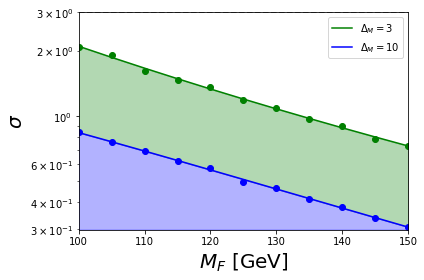

In [15]:
plot_fit(df,Lumi=100000,xmin=100,xmax=150,ymin=0.3,ymax=3,LaL1=3,LaL2=10,sigma=3,dots=True,
         pw1=2,pw2=2,ylabel=r'$\sigma$')

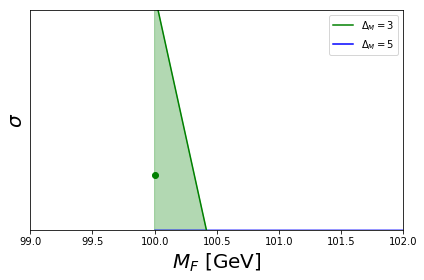

In [16]:
plot_fit(df,Lumi=100000,xmin=99,xmax=102,ymin=2.08,ymax=2.10,LaL1=3,LaL2=5,sigma=3,dots=True,
         pw1=3,pw2=3,ylabel=r'$\sigma$')

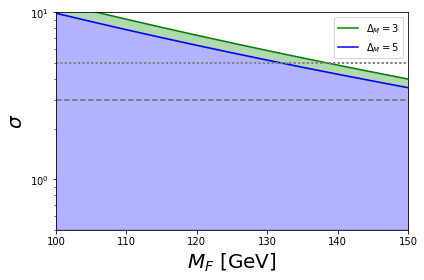

In [17]:
plot_fit(df,Lumi=3.E6,xmin=100,xmax=150,ymin=0.5,ymax=10,LaL1=3,LaL2=5,sigma=3,dots=False,
         pw1=2,pw2=2,ylabel=r'$\sigma$')

### Figure 9

### need to define instead LaL_excl

In [18]:
excl=3
df['MH0_excl']=0
df['Sgnf_excl']=excl

In [19]:
LaL1=10;crossing_plot=False
flag1=1

for LaL1 in np.sort(df.LaL.unique())[::-1]:
    print(LaL1)
    for Lumi in Lumis: #Lumis:    
        dffix=df[ np.logical_and( np.logical_and(df.flag1==flag1,df.Luminosity==Lumi),\
                  df.LaL==LaL1              )]
        df_match=dffix.index.values
        #print(Lumi,df_match[0])
        
        dffix=dffix.reset_index(drop=True)
        
        if not dffix.shape[0]:
            sys.exit('LaL=%g not found in data' %LaL1)
            
            
        cf=curvefit(dffix.MH0[0],dffix.Significance[0])
        cf.add_fit(2,ShowPlot=False)


        x = np.arange(dffix.MH0[0][0]-50,dffix.MH0[0][-1]+300, 0.05)
        #find the crossing between a curve cf(x) and a straight linx g(x)
        idx = np.argwhere(np.diff(np.sign (cf(x) - g(x,excl=excl) )) != 0).reshape(-1) + 0#
        excl_d={'M':0,'Sgnf':excl}
        if idx.shape[0]:
            excl_d={'M':x[idx[-1]],'Sgnf':cf(x)[idx[-1]]}
            if df_match.shape[0]:
                df.loc[df_match[0],'MH0_excl']=excl_d['M']
                df.loc[df_match[0],'Sgnf_excl']=excl_d['Sgnf']


        if crossing_plot:
            #dffix['MH0_excl']=excl['M']
            plt.semilogy(x,cf(x))
            plt.semilogy(x,g(x))
            plt.plot(excl_d['M'],excl_d['Sgnf'] , 'ro')

10.0
9.0
8.0
7.0
6.0
5.0
4.0
3.0
2.0
1.0


In [20]:
mpl.style.use('classic')

In [21]:
excl

3

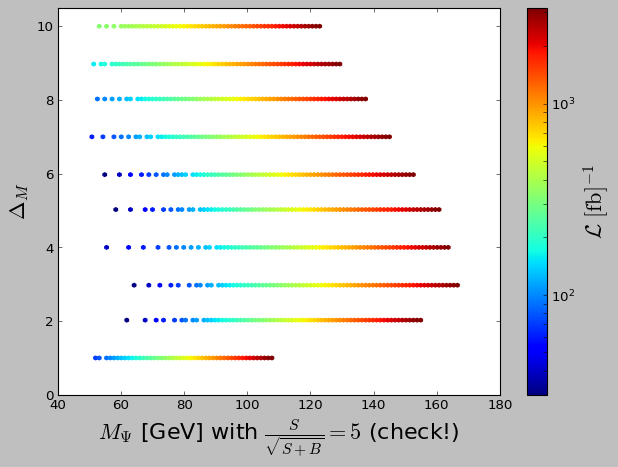

In [22]:
df=df[df.MH0_excl>0]
plt.hexbin(df.MH0_excl,df.LaL,df.Luminosity/1000.,yscale='lin',norm=LogNorm())
ax=plt.colorbar()#ticks=[30,100,300,500,700,1000,3000])
#ax.set_ticklabels([30,100,300,1000,3000])
ax.set_label(r'${\cal L}\ [{\rm fb}]^{-1}$',size=20)
plt.xlim(40,180)
plt.ylim(0.,10.5)
plt.xlabel(r'$M_{\Psi}$ [GeV] with $\frac{S}{\sqrt{S+B}}=5$ (check!)',size=20)
plt.ylabel(r'$\Delta_M$',size=20)
plt.tight_layout()
plt.savefig('lc.pdf')
#plt.fill_between(xlf,lf(xlf),0.01,alpha=0.3,facecolor='m')
#plt.plot(lower.MH0_excl,lower.LaL,'ko')

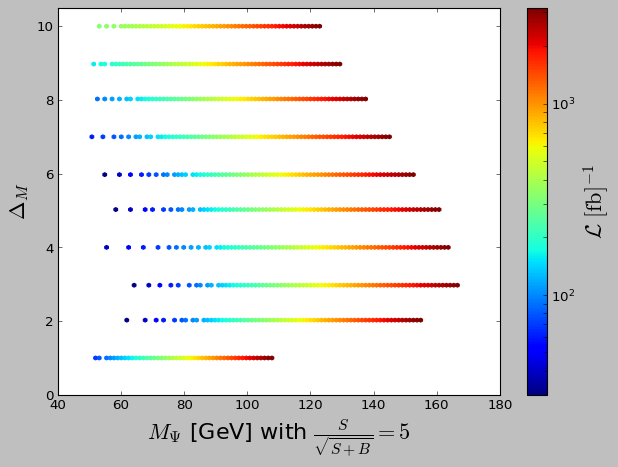

In [23]:
df=df[df.MH0_excl>0]
plt.hexbin(df.MH0_excl,df.LaL,df.Luminosity/1000.,yscale='lin',norm=LogNorm())
ax=plt.colorbar()#ticks=[30,100,300,500,700,1000,3000])
#ax.set_ticklabels([30,100,300,1000,3000])
ax.set_label(r'${\cal L}\ [{\rm fb}]^{-1}$',size=20)
plt.xlim(40,180)
plt.ylim(0.,10.5)
plt.xlabel(r'$M_{\Psi}$ [GeV] with $\frac{S}{\sqrt{S+B}}=5$',size=20)
plt.ylabel(r'$\Delta_M$',size=20)
plt.tight_layout()
plt.savefig('lc.pdf')
#plt.fill_between(xlf,lf(xlf),0.01,alpha=0.3,facecolor='m')
#plt.plot(lower.MH0_excl,lower.LaL,'ko')

In [24]:
maxLaL=0.55
dfl=df[df.LaL<maxLaL]
mf=[];lf=[]
for l in np.sort(dfl.LaL.unique())[::-1]:
    xx,yy=dfl[dfl.LaL==l].MH0_excl.min(),l
    mf.append(xx);lf.append(yy)

df_full=df.copy()
dfm=pd.DataFrame()
for L in [30000.,100000.,300000,1000000.,3000000.]:
    dfm=dfm.append(df_full[df_full.Luminosity==L],ignore_index=True)

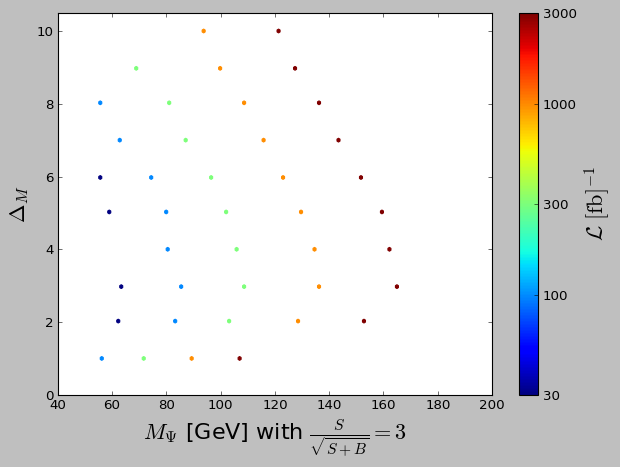

In [25]:
dfm=dfm[dfm.MH0_excl>0]
plt.hexbin(dfm.MH0_excl,dfm.LaL,dfm.Luminosity/1000.,yscale='lin',norm=LogNorm())
ax=plt.colorbar(ticks=[30,100,300,1000,3000])
ax.set_ticklabels([30,100,300,1000,3000])
ax.set_label(r'${\cal L}\ [{\rm fb}]^{-1}$',size=20)
plt.xlim(40,200)
plt.ylim(0.0,10.5)
plt.xlabel(r'$M_{\Psi}$ [GeV] with $\frac{S}{\sqrt{S+B}}=3$',size=20)
plt.ylabel(r'$\Delta_M$',size=20)
plt.tight_layout()
#plt.savefig('lc.pdf')

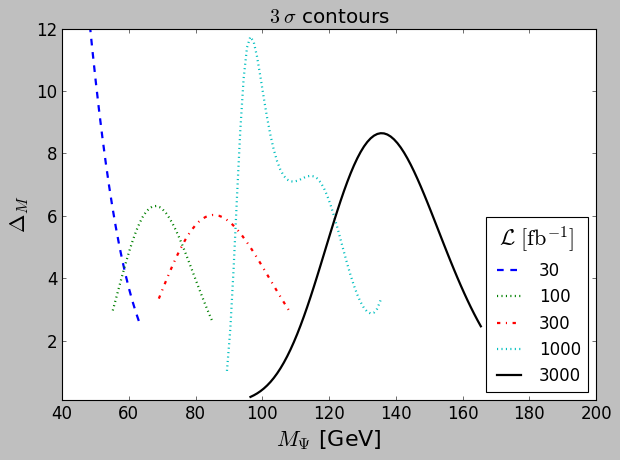

In [26]:
### orig.
Dots=False
Lumis=[30000.,100000.,300000,1000000.,3000000.]
plt.rcParams.update({'font.size': 15})
line_format=['b--','g:','r-.','c:','k-']
i=0
for Lumi in Lumis:
    sd=df[df.Luminosity==Lumi]
    sf=curvefit(sd.MH0_excl,sd.LaL)
    #Special cases
    pw=5
    fix_beg=0
    if Lumi==30000:
        pw=2
        fix_beg=10
    if  Lumi==100000:
        fix_beg=0
        pw=2
    if  Lumi==300000:
        fix_beg=0
        #pw=3
        pw=2
    if Lumi==3000000:
        pw=2
        #pw=6
        fix_beg=10

    #if Lumi==300000:
    #    pw=3        
    sf.add_fit(pw,ShowPlot=False)
    x=np.arange(sd.MH0_excl.min()-fix_beg,sd.MH0_excl.max())
    #plt.semilogy( x, sf(x),line_format[i],label='%d' %int(Lumi/1000) ,lw=2 ) 
    plt.plot( x, sf(x),line_format[i],label='%d' %int(Lumi/1000) ,lw=2 ) 
    if Dots:
        plt.semilogy( sd.MH0_excl, sd.LaL,'r*' ) 
    i=i+1

if Dots:
    plt.hexbin(dfm.MH0_excl,dfm.LaL,dfm.Luminosity/1000.,yscale='lin',norm=LogNorm())
#xlf=np.arange(mf[0],mf[-1]+15)
#plt.fill_between(xlf,lf(xlf),0.01,alpha=0.3,facecolor='m',lw=0)
leg=plt.legend(loc='lower right',prop={'size':15})
leg.set_title(r'${\cal L}\ [{\rm fb}^{-1}]$',prop={'size':20})
plt.xlim(40,200)
plt.ylim(0.1,12) 
plt.title('$3\;\sigma$ contours' )
plt.xlabel(r'$M_{\Psi}$ [GeV]',size=20)
plt.ylabel(r'$\Delta_M$',size=20)
plt.tight_layout()
#plt.savefig('lcf.pdf')

In [101]:
### new test.
Dots=False
Lumis=[30000.,100000.,300000,1000000.,3000000.]
plt.rcParams.update({'font.size': 15})
line_format=['b--','g:','r-.','c:','k-']
i=0
for Lumi in Lumis:
    sd=df[df.Luminosity==Lumi]
    sf=curvefit(sd.LaL,sd.MH0_excl)
    #Special cases
    pw=5
    fix_beg=0
    if Lumi==30000:
        pw=2
        fix_beg=10
    if  Lumi==100000:
        fix_beg=0
        pw=2
    if  Lumi==300000:
        fix_beg=0
        #pw=3
        pw=2
    if Lumi==3000000:
        pw=2
        #pw=6
        fix_beg=10

    #if Lumi==300000:
    #    pw=3        
    sf.add_fit(pw,ShowPlot=False)
    #x=np.arange(sd.MH0_excl.min()-fix_beg,sd.MH0_excl.max())
    #plt.plot( x, sf(x),line_format[i],label='%d' %int(Lumi/1000) ,lw=2 ) 
    x=np.arange(sd.LaL_excl.min()-fix_beg,sd.LaL_excl.max())
    plt.plot( x, sf(x),line_format[i],label='%d' %int(Lumi/1000) ,lw=2 ) 
    if Dots:
        plt.semilogx( sd.LaL, sd.MH0_excl, 'r*' ) 
    i=i+1

if Dots:
    plt.hexbin(dfm.LaL,dfm.MH0_excl,dfm.Luminosity/1000.,yscale='lin',norm=LogNorm())
#xlf=np.arange(mf[0],mf[-1]+15)
#plt.fill_between(xlf,lf(xlf),0.01,alpha=0.3,facecolor='m',lw=0)
leg=plt.legend(loc='lower right',prop={'size':15})
leg.set_title(r'${\cal L}\ [{\rm fb}^{-1}]$',prop={'size':20})
plt.ylim(40,200)
plt.xlim(0.1,12) 
plt.title('$3\;\sigma$ contours' )
plt.ylabel(r'$M_{\Psi}$ [GeV]',size=20)
plt.xlabel(r'$\Delta_M$',size=20)
plt.tight_layout()
#plt.savefig('lcf.pdf')

AttributeError: 'DataFrame' object has no attribute 'LaL_excl'

### Figures 7 (b) y 8 (b)

#### Full data with full luminosities for $M_{H^\pm}=250$ GeV

### --------------------------------------------------------
##### doesnt work from here!

In [151]:

flag1=1

df250=pd.DataFrame()
Lumis=[30000.,100000.,300000.,3000000.]
LaL=np.array([0.01,0.1,0.5,1.0,5.0,10.0])
MH0=np.array([70,75,80,85,90,110,130,150,190,210,220,240])
XS=np.array([[0.0349202532,0.0334004548,0.0317959539,0.0299136009,0.0284446578,0.0231171019,0.0182469057,0.0145908085,0.0032957252,0.0008311599,0.0002327398,2.69170669596E-005],[0.0401153803,0.0365328119,0.0339879003,0.0318100305,0.0299869285,0.0236790908,0.018614465,0.0148075782,0.0033628365,0.0008528258,0.0002575083,3.76243302046E-005],[0.1292954556,0.0877346517,0.0671422842,0.055387881,0.0473004018,0.0303751277,0.0220217644,0.0166179432,0.003983908,0.0012414054,0.0005508421,0.000212817],[0.3925881269,0.235609451,0.163829771,0.1215055018,0.0961519127,0.0487745888,0.0302338164,0.0211453691,0.0056017643,0.002215103,0.0013337227,0.0007131346],[8.8106015968,4.9330438839,3.2202837071,2.2445297762,1.6530410394,0.6298478626,0.2986637424,0.1646727753,0.0551913027,0.0339149853,0.0267049906,0.0175325777],[37.5523833824,21.5683403078,14.1510102501,10.1290781829,7.4208955246,2.883369972,1.3888054495,0.750051374,0.260519149,0.1647700939,0.1322070255,0.0871119659]])
Eff=np.array([[0.10438413361169102, 0.5230125523012552, 1.142263759086189, 1.3555787278415015, 1.4462809917355373, 1.2461059190031152], [0.2066115702479339, 0.625, 0.9394572025052192, 1.3499480789200415, 2.2821576763485476, 0.8359456635318704], [0.2070393374741201, 0.4175365344467641, 1.2396694214876034, 0.9297520661157025, 1.6684045881126173, 1.9771071800208118], [0.10471204188481675, 0.1037344398340249, 1.5723270440251573, 1.2474012474012475, 1.6528925619834711, 1.037344398340249], [0.0, 0.10482180293501048, 0.8221993833504625, 1.4598540145985401, 0.82389289392379, 1.435897435897436], [0.20639834881320948, 0.31088082901554404, 1.1387163561076605, 1.45681581685744, 1.3347022587268993, 0.8264462809917356], [0.20639834881320948, 0.30991735537190085, 0.6211180124223602, 1.5321756894790604, 2.5693730729701953, 1.0245901639344261], [0.2074688796680498, 0.10330578512396695, 0.8171603677221655, 1.2539184952978057, 1.6494845360824741, 1.7329255861365953], [0.0, 0.1180637544273908, 0.7821229050279329, 2.549889135254989, 2.378490175801448, 2.443991853360489], [0.684931506849315, 0.2604166666666667, 1.7921146953405018, 2.137232845894263, 2.6859504132231407, 3.8578680203045685], [1.0810810810810811, 1.4397905759162304, 3.939745075318656, 2.912621359223301, 3.615702479338843, 2.032520325203252], [3.814432989690722, 4.732510288065844, 3.6923076923076925, 2.3613963039014374, 2.5510204081632653, 2.443991853360489]])

for Lumi in Lumis:
    Significance=significance(XS,Eff,Lumi,NB)
    for i in range(LaL.shape[0]):
        df250=df250.append({'flag1':flag1,'Luminosity':Lumi,'LaL':LaL[i],'MH0':MH0,'XS':XS[i],'Eff':Eff.transpose()[i],\
                      'Significance':Significance.transpose()[i]},ignore_index=True)                 

In [153]:
plot_fit(df250,flag1=1,Lumi=30000,xmin=70,xmax=300,ymin=0.1,ymax=10,LaL1=3,LaL2=5,sigma=3,dots=False,
         pw1=3,pw2=3,ylabel=r'$\sigma$')

TypeError: plot_fit() got an unexpected keyword argument 'flag1'

File: Signif_MHp_250_Lum_3000.pdf created


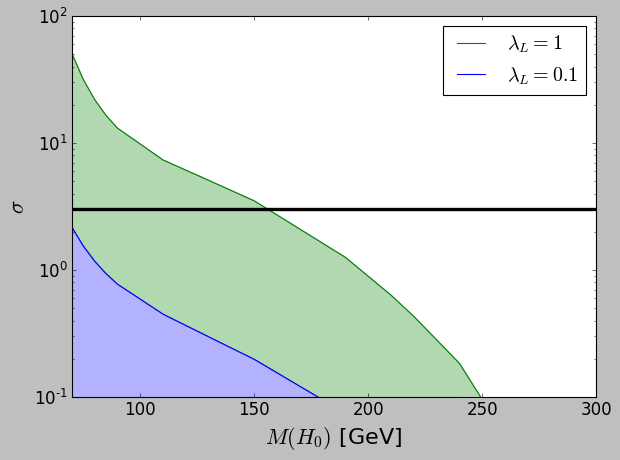

In [19]:
plot_fit(df250,MHp=250,Lumi=3000000,xmin=70,xmax=300,ymin=0.1,ymax=100,LaL1=1,LaL2=0.1,sigma=3,dots=False,
         pw1=3,pw2=3,ylabel=r'$\sigma$')

## Backup plots

(0.01, 1)

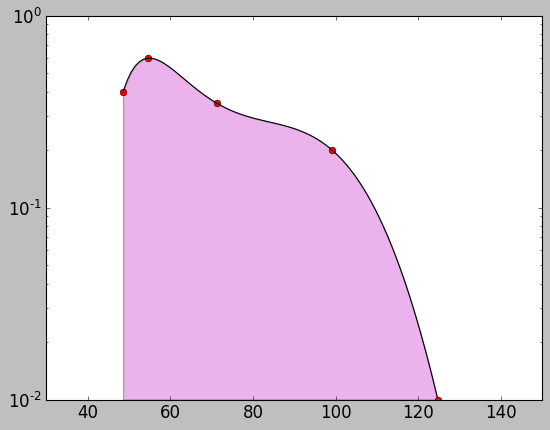

In [36]:
plt.rcParams.update({'font.size': 15})
lower=pd.DataFrame()
store_lower=True
points=False
i=0
for Lumi in Lumis:
    sd=df[df.Luminosity==Lumi]
    x=np.arange(sd.MH0_excl.min(),sd.MH0_excl.max())
    if store_lower:
        ymin=sd.LaL.min()
        get_point=sd[sd.LaL==ymin]
        if get_point.shape[0]==1:
            lower=lower.append(get_point[['MH0_excl','LaL']],ignore_index=True)
  
    if ymin==df.LaL.min():
        store_lower=False    
    
    i=i+1

    

plt.plot(lower.MH0_excl,lower.LaL,'ro')
lf=curvefit(lower.MH0_excl,lower.LaL)
lf.add_fit(4,ShowPlot=False)
xlf=np.arange( lower.MH0_excl.min(),lower.MH0_excl.max()  )
plt.semilogy(xlf,lf(xlf),'k-')
plt.fill_between(xlf,lf(xlf),0.01,alpha=0.3,facecolor='m')
#leg=plt.legend(loc='lower right',prop={'size':15})
#leg.set_title(r'${\cal L}\ [{\rm fb}^{-1}]$',prop={'size':20})
plt.xlim(30,150)
plt.ylim(1.E-2,1)    

File: Signif_dots_MHp_250_Lum_30.pdf created


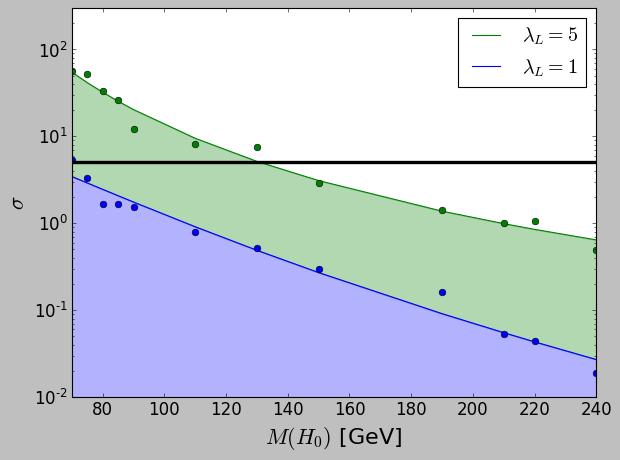

In [39]:
plot_fit(df250,MHp=250,Lumi=30000,ymin=0.01,ymax=300,LaL1=5,LaL2=1,dots=True)

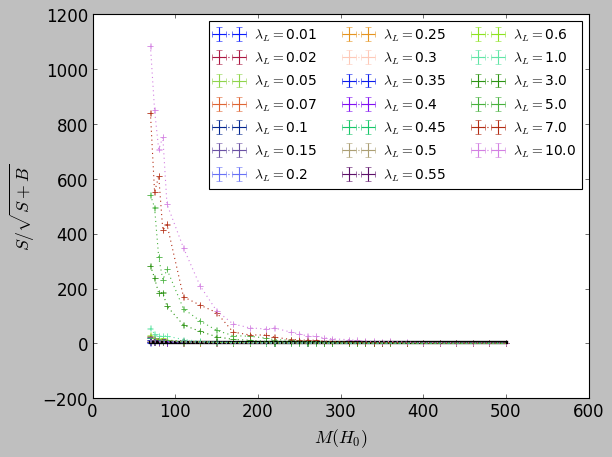

In [41]:
Uncertainty=np.sqrt(0.1**2+(np.sqrt(30)/30)**2) #Uncertainty from 8 TeV analysis + statistical uncertainty from MC samples
fig = plt.figure()
ax = fig.add_subplot(111)
for i in xrange(len(LaL)):
    ax.errorbar(MH0,Significance.transpose()[i], xerr=0.1, yerr=Uncertainty, linestyle='dotted', 
                label='$\lambda_{L}=$'+str(LaL[i]), color=np.random.rand(3,1))
#ax.errorbar(MH0,Significance.transpose()[0], xerr=0.1, yerr=Uncertainty, linestyle='dotted', label='$\lambda_{L}=0.01$')
#ax.errorbar(MH0,Significance.transpose()[-1], xerr=0.1, yerr=Uncertainty, linestyle='dotted', label='$\lambda_{L}=10.0$')
#ax.plot(MH0,Significance.transpose()[0],color="red",linestyle='solid')
#ax.plot(MH0,Significance.transpose()[5],color="blue",linestyle='solid')
#ax.plot(MH0,Significance.transpose()[10],color="green",linestyle='solid')
#ax.plot(MH0,Significance.transpose()[15],color="yellow",linestyle='solid')
#ax.plot(MH0,Significance.transpose()[18],color="magenta",linestyle='solid')
#ax.plot(MH0,Significance.transpose()[-1],color="black",linestyle='solid')
ax.plot((MH0[0],MH0[-1]),(5.0,5.0),linewidth=3,color="black",linestyle='solid')
#ax.axhline(y=10.0, xmin=MH0[0], xmax=MH0[-1], linewidth=10, color = 'k')
#ax.set_yscale('log')
ax.set_ylabel(r'$S/\sqrt{S+B}$', fontsize=16)
ax.set_xlabel(r'$M(H_{0})$', fontsize=16)
legend = ax.legend(loc='upper right', shadow=False, fontsize='small', ncol=3)
plt.show()